We will construct a linear model that explains the relationship a car's mileage (mpg) has with its other attributes

# Import Libraries

In [4]:
import numpy as np   
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd    

# Load and review data

In [7]:
car_df = pd.read_csv("auto-mpg.csv")  

In [8]:
car_df.shape

(398, 9)

In [9]:
car_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [10]:
car_df.sample(10)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
250,19.4,8,318.0,140,3735,13.2,78,1,dodge diplomat
390,32.0,4,144.0,96,2665,13.9,82,3,toyota celica gt
45,18.0,6,258.0,110,2962,13.5,71,1,amc hornet sportabout (sw)
160,17.0,6,231.0,110,3907,21.0,75,1,buick century
101,23.0,6,198.0,95,2904,16.0,73,1,plymouth duster
80,22.0,4,122.0,86,2395,16.0,72,1,ford pinto (sw)
251,20.2,8,302.0,139,3570,12.8,78,1,mercury monarch ghia
208,13.0,8,318.0,150,3940,13.2,76,1,plymouth volare premier v8
55,27.0,4,97.0,60,1834,19.0,71,2,volkswagen model 111
130,26.0,4,122.0,80,2451,16.5,74,1,ford pinto


In [11]:
#dropping the unwanted attriburte car_name 
car_df = car_df.drop('car name', axis=1)
car_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [12]:
car_df['origin'] = car_df['origin'].replace({1: 'america', 2: 'europe', 3: 'asia'})
car_df.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
336,23.6,4,140.0,?,2905,14.3,80,america
113,21.0,6,155.0,107,2472,14.0,73,america
209,19.0,4,120.0,88,3270,21.9,76,europe
280,21.5,6,231.0,115,3245,15.4,79,america
243,21.5,3,80.0,110,2720,13.5,77,asia
249,19.9,8,260.0,110,3365,15.5,78,america
283,20.2,6,232.0,90,3265,18.2,79,america
131,32.0,4,71.0,65,1836,21.0,74,asia
375,36.0,4,105.0,74,1980,15.3,82,europe
103,11.0,8,400.0,150,4997,14.0,73,america


In [13]:
### One hot encoding
car_df = pd.get_dummies(car_df, columns=['origin']) ### one hot encoding
car_df.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
94,13.0,8,440.0,215,4735,11.0,73,1,0,0
124,11.0,8,350.0,180,3664,11.0,73,1,0,0
274,20.3,5,131.0,103,2830,15.9,78,0,0,1
264,18.1,8,302.0,139,3205,11.2,78,1,0,0
51,30.0,4,79.0,70,2074,19.5,71,0,0,1
254,20.2,6,200.0,85,2965,15.8,78,1,0,0
214,13.0,8,302.0,130,3870,15.0,76,1,0,0
61,21.0,4,122.0,86,2226,16.5,72,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,1,0,0
13,14.0,8,455.0,225,3086,10.0,70,1,0,0


# Dealing with Missing Values

In [16]:
car_df.describe(include="all")


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
count,398.000000,398.000000,398.000000,398,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
unique,NaN,NaN,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,150,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,22,NaN,NaN,NaN,NaN,NaN,NaN
mean,23.514573,5.454774,193.425879,NaN,2970.424623,15.568090,76.010050,0.625628,0.198492,0.175879
std,7.815984,1.701004,104.269838,NaN,846.841774,2.757689,3.697627,0.484569,0.399367,0.381197
min,9.000000,3.000000,68.000000,NaN,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.500000,4.000000,104.250000,NaN,2223.750000,13.825000,73.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,148.500000,NaN,2803.500000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,29.000000,8.000000,262.000000,NaN,3608.000000,17.175000,79.000000,1.000000,0.000000,0.000000


In [17]:
car_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mpg             398 non-null    float64
 1   cylinders       398 non-null    int64  
 2   displacement    398 non-null    float64
 3   horsepower      398 non-null    object 
 4   weight          398 non-null    int64  
 5   acceleration    398 non-null    float64
 6   model year      398 non-null    int64  
 7   origin_america  398 non-null    uint8  
 8   origin_asia     398 non-null    uint8  
 9   origin_europe   398 non-null    uint8  
dtypes: float64(3), int64(3), object(1), uint8(3)
memory usage: 23.1+ KB


In [18]:
car_df.dtypes


mpg               float64
cylinders           int64
displacement      float64
horsepower         object
weight              int64
acceleration      float64
model year          int64
origin_america      uint8
origin_asia         uint8
origin_europe       uint8
dtype: object

In [19]:
hpIsDigit = pd.DataFrame(car_df.horsepower.str.isdigit())
car_df[hpIsDigit['horsepower'] == False]# from temp take only those rows where hp has false

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
32,25.0,4,98.0,?,2046,19.0,71,1,0,0
126,21.0,6,200.0,?,2875,17.0,74,1,0,0
330,40.9,4,85.0,?,1835,17.3,80,0,0,1
336,23.6,4,140.0,?,2905,14.3,80,1,0,0
354,34.5,4,100.0,?,2320,15.8,81,0,0,1
374,23.0,4,151.0,?,3035,20.5,82,1,0,0


In [20]:
# Missing values have a'?''
# Replace missing values with NaN
car_df = car_df.replace('?', np.nan)
car_df[hpIsDigit['horsepower'] == False] 

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
32,25.0,4,98.0,NaN,2046,19.0,71,1,0,0
126,21.0,6,200.0,NaN,2875,17.0,74,1,0,0
330,40.9,4,85.0,NaN,1835,17.3,80,0,0,1
336,23.6,4,140.0,NaN,2905,14.3,80,1,0,0
354,34.5,4,100.0,NaN,2320,15.8,81,0,0,1
374,23.0,4,151.0,NaN,3035,20.5,82,1,0,0


In [21]:
#instead of dropping the rows, lets replace the missing values with median value. 
car_df.median()

mpg                 23.0
cylinders            4.0
displacement       148.5
horsepower          93.5
weight            2803.5
acceleration        15.5
model year          76.0
origin_america       1.0
origin_asia          0.0
origin_europe        0.0
dtype: float64

In [22]:
# replace the missing values with median value.
# Note, we do not need to specify the column names below
# every column's missing value is replaced with that column's median respectively


medianFiller = lambda x: x.fillna(x.median())
car_df = car_df.apply(medianFiller,axis=0)

car_df['horsepower'] = car_df['horsepower'].astype('float64')  # converting the hp column from object / str

In [23]:
car_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130.0,3504,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,0,0


# BiVariate Plots

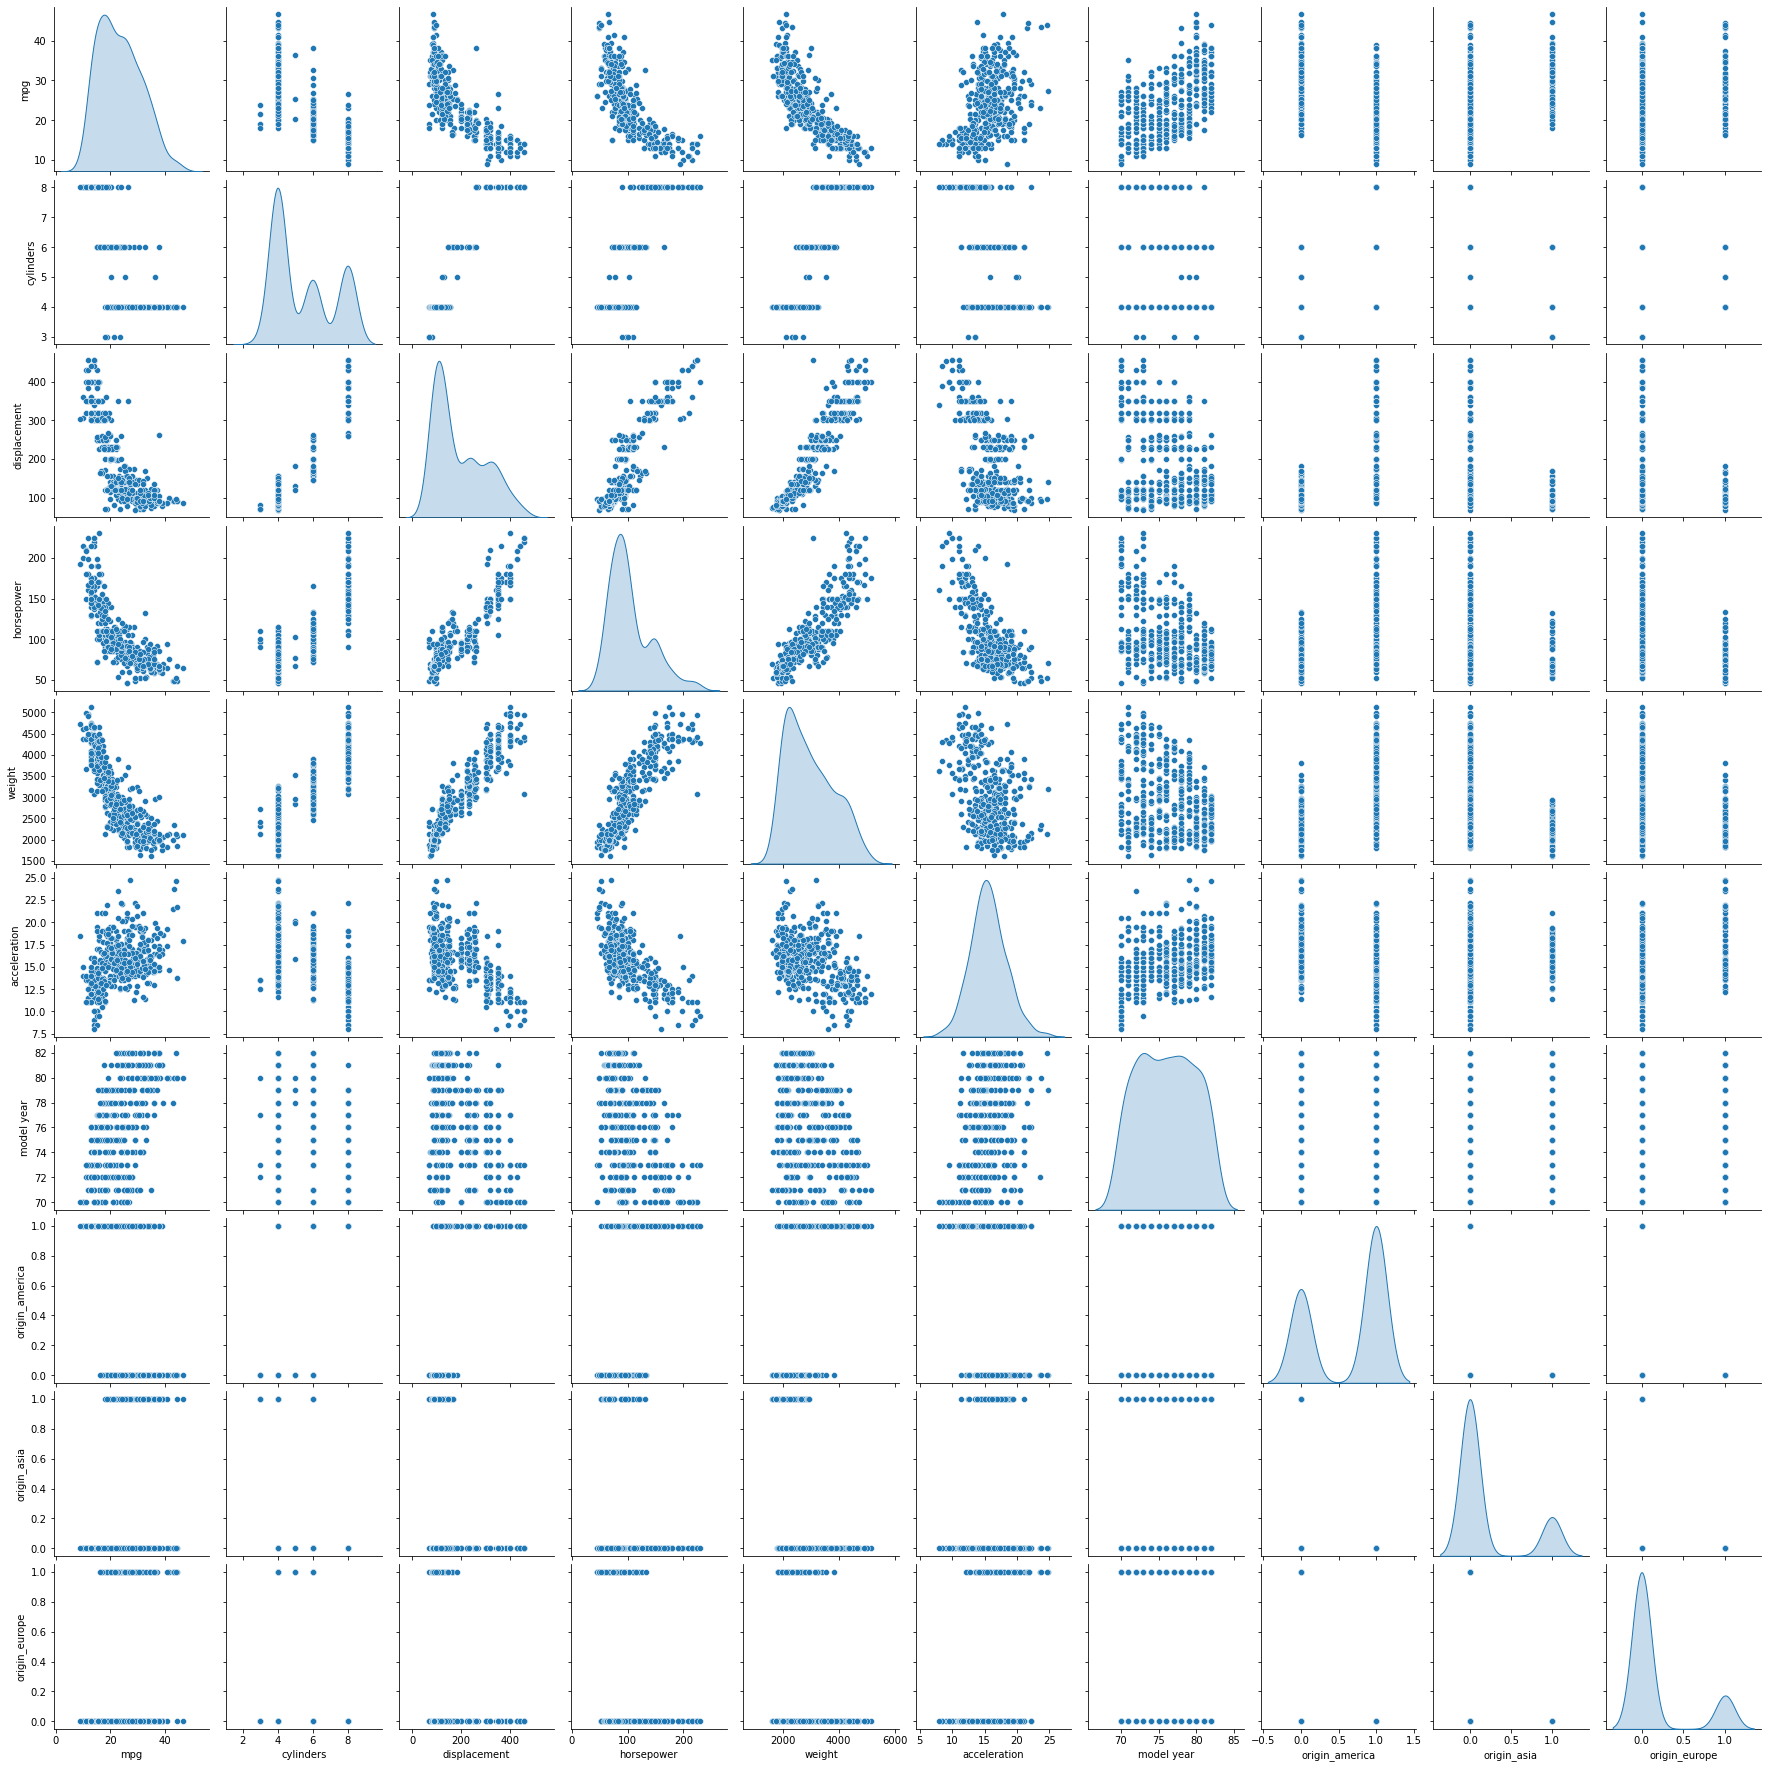

In [24]:
sns.pairplot(car_df,diag_kind='kde')

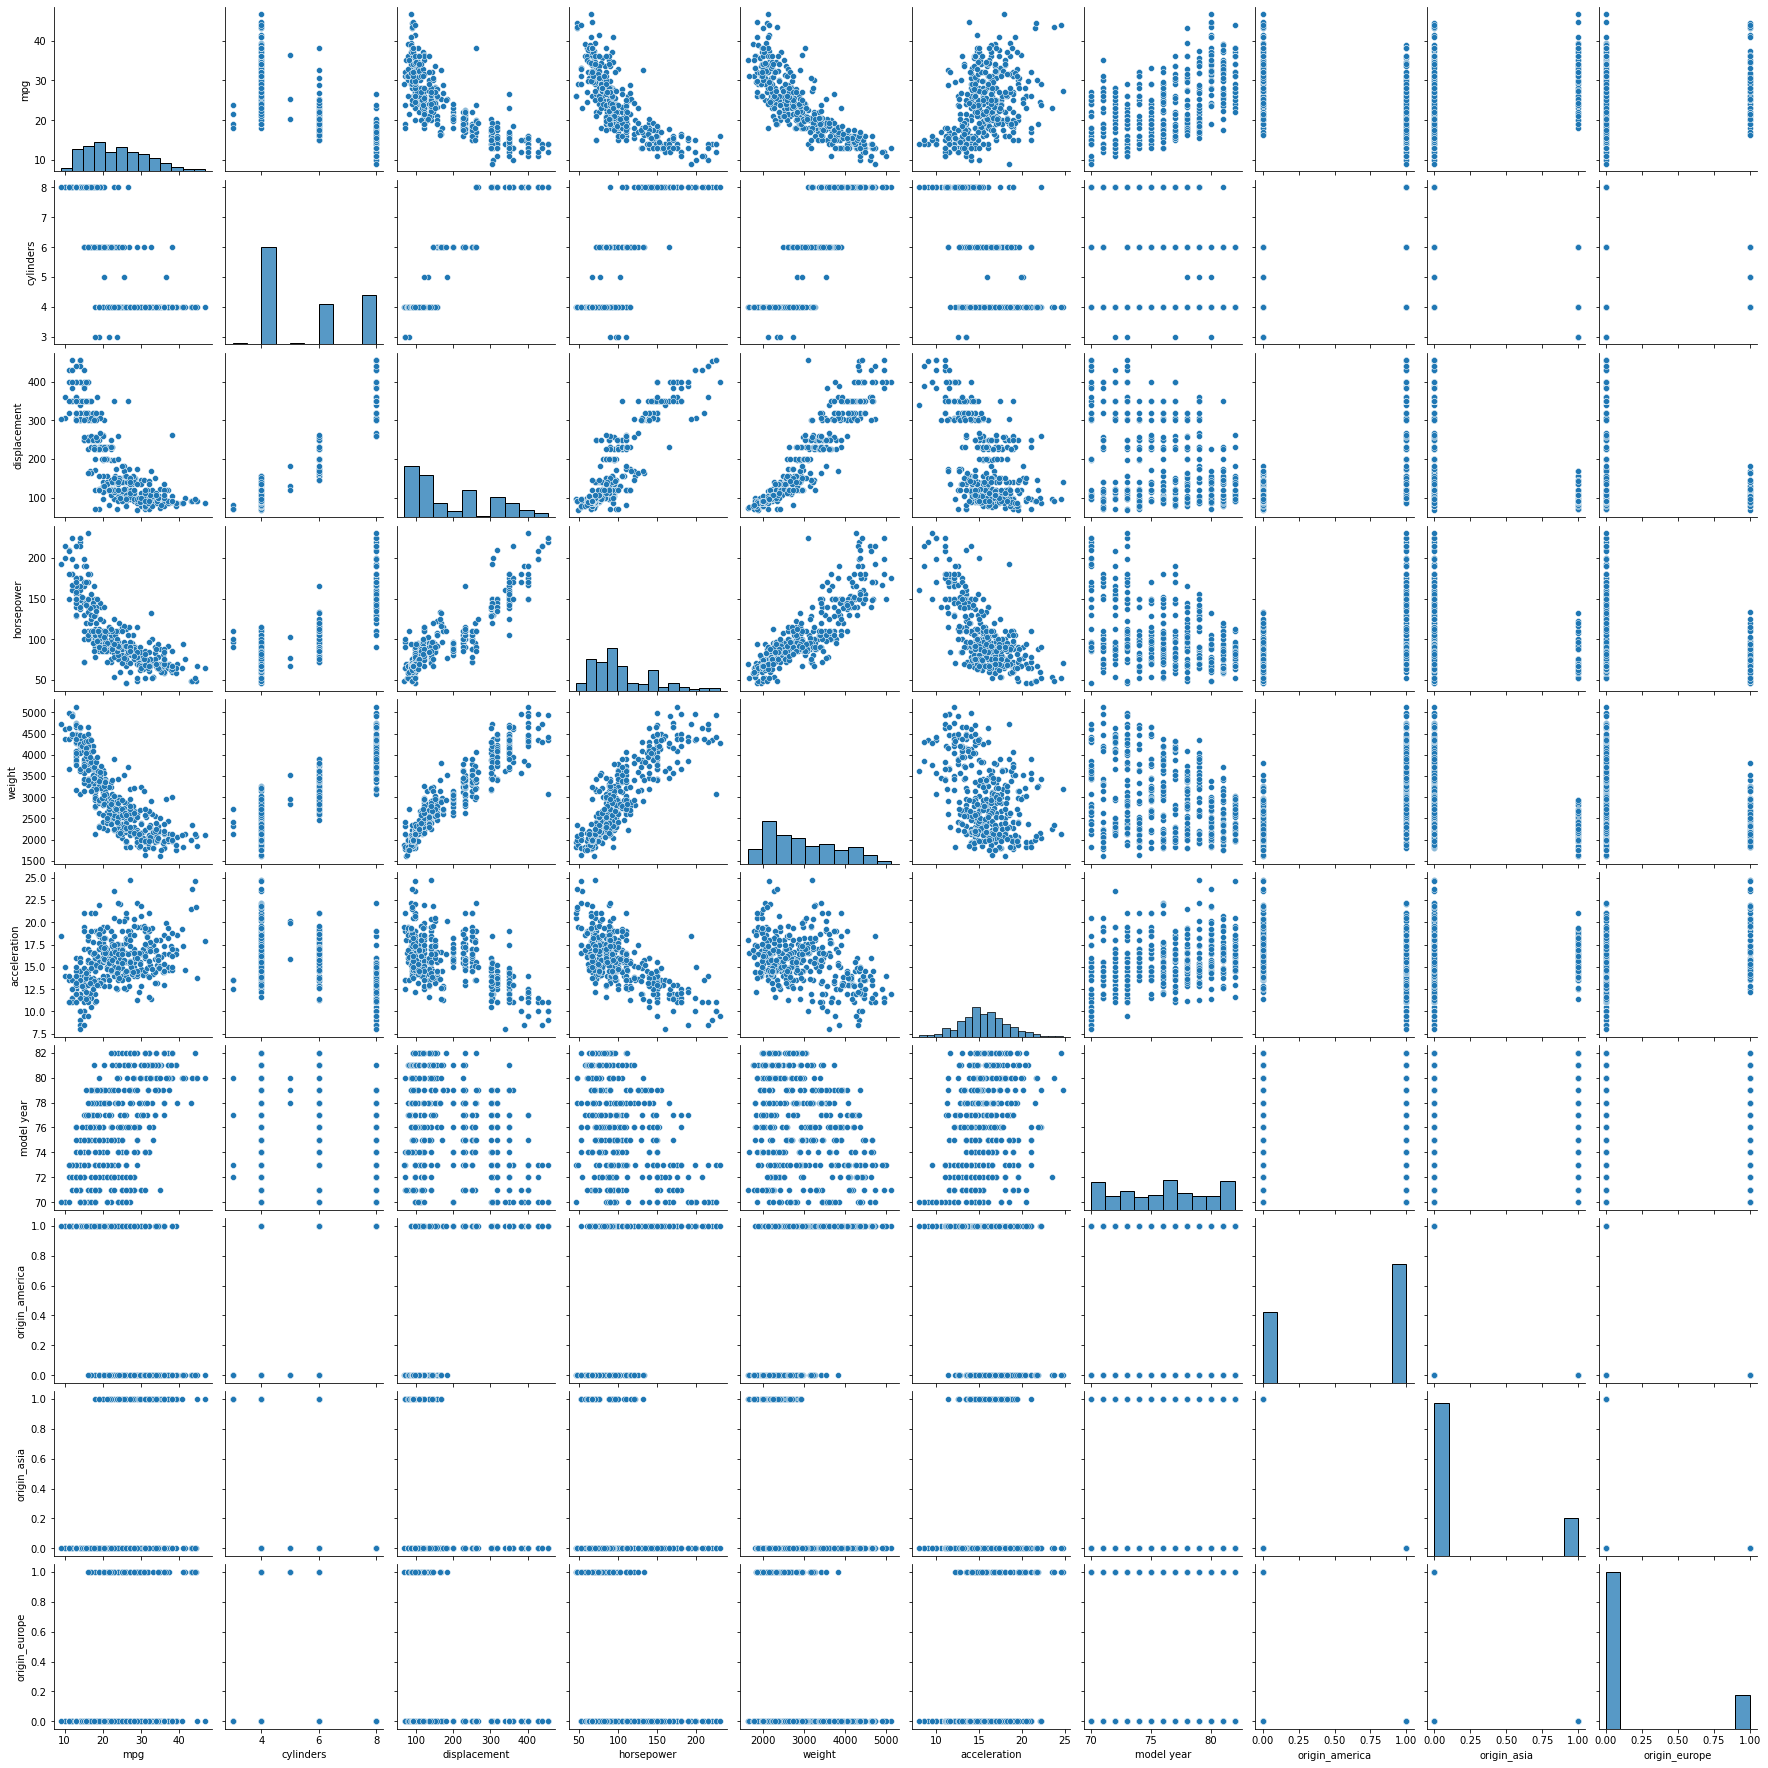

In [25]:
sns.pairplot(car_df,diag_kind='hist')

Observation between 'mpg' and other attributes indicate the relationship is not really linear. However, the plots also indicate that linearity would still capture quite a bit of useful information/pattern. Several assumptions of classical linear regression seem to be violated, including the assumption of no Heteroscedasticity

# Split Data


In [26]:
# lets build our linear model
# independant variables
X = car_df.drop(['mpg'], axis=1)
# the dependent variable
y = car_df[['mpg']]

In [27]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

# Fit Linear Model

# Linear Regression model


In [28]:
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression()

In [29]:
reg_model.score(X_train, y_train)


0.814102550161056

In [30]:
#out of sample score (R^2)

reg_model.score(X_test, y_test)

0.8433135132808829

### The score is 0.8433135132808829 for linear regression model.

# Polynomial Regression

In [32]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train2, y_train)

y_pred = poly_clf.predict(X_test2)

#print(y_pred)

#In sample (training) R^2 will always improve with the number of variables!
print(poly_clf.score(X_train2, y_train))

0.9015333047618629


In [33]:
#Out off sample (testing) R^2 is our measure of sucess and does improve
print(poly_clf.score(X_test2, y_test))

0.8647737725363911


# The score is better for polynomial regression than linear regression.

### The score is 0.8647737725363911